In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import norm, zscore, multivariate_normal
import math
import transmorph as tr

In [2]:
xs = np.loadtxt('datasets/pdx352.csv', delimiter=',')
yt = np.loadtxt('datasets/chla9.csv', delimiter=',')

# Optimal transport

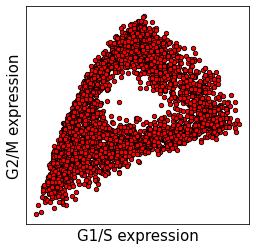

In [3]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, c='r', s=20, ec='k', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_cc.png")

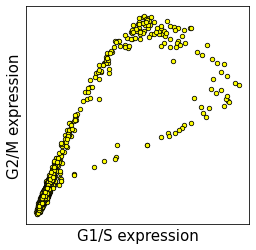

In [4]:
plt.figure( figsize=(4,4) )
plt.scatter(*xs.T, s=20, ec='k', c='yellow', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("PDX352_cc.png")

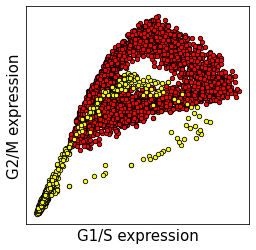

In [5]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, c='r', s=20, ec='k', linewidth=.8)
plt.scatter(*xs.T, s=20, ec='k', c='yellow', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_PDX352_cc.png")

In [6]:
w_weighted = tr.Transmorph(method='ot', scale=5e-2)
w_unweighted = tr.Transmorph(method='ot', weighted=False)

Transmorph > Successfully initialized.
(Transmorph) ot based -- max_iter: 1000000 -- no entropy -- weighted, alpha_qp: 1.000000, scale: 0.050000
Transmorph > Successfully initialized.
(Transmorph) ot based -- max_iter: 1000000 -- no entropy -- unweighted


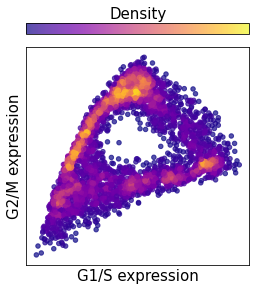

In [7]:
plt.figure( figsize=(4,5) )
plt.scatter(*yt.T, c=w_weighted.get_density(yt), s=20, cmap='plasma', alpha=.7)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
cbar = plt.colorbar(location='top')
cbar.set_ticks([])
cbar.set_label("Density", size=15)
plt.savefig("CHLA9_density.png")

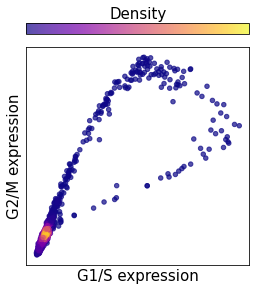

In [8]:
plt.figure( figsize=(4,5) )
plt.scatter(*xs.T, c=w_weighted.get_density(xs), s=20, cmap='plasma', alpha=.7)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
cbar = plt.colorbar(location='top')
cbar.set_ticks([])
cbar.set_label("Density", size=15)
plt.savefig("PDX352_density.png")

In [9]:
xt_unweighted = w_unweighted.fit_transform(xs, yt) # Equal weights
xt_weighted = w_weighted.fit_transform(xs, yt) # Density correction

Transmorph > Computing optimal transport plan...
WOTi > Computing optimal transport plan...
Transmorph > Transmorph fitted.
Transmorph > Projecting dataset...
Transmorph > Computing source distribution weights...
Transmorph > Computing reference distribution weights...
Transmorph > Computing optimal transport plan...
WOTi > Computing optimal transport plan...
Transmorph > Transmorph fitted.
Transmorph > Projecting dataset...


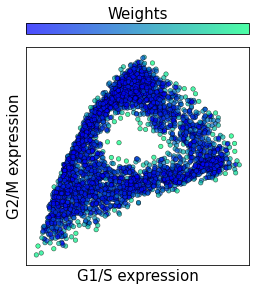

In [10]:
plt.figure( figsize=(4,5) )
plt.scatter(*yt.T, c=w_weighted.get_wy(), s=20, cmap='winter', alpha=.7, ec='k', linewidth=.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
cbar = plt.colorbar(location='top')
cbar.set_ticks([])
cbar.set_label("Weights", size=15)
plt.savefig("CHLA9_weights.png")

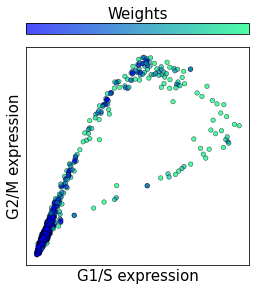

In [11]:
plt.figure( figsize=(4,5) )
plt.scatter(*xs.T, c=w_weighted.get_wx(), s=20, cmap='winter', alpha=.7, ec='k', linewidth=.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
cbar = plt.colorbar(location='top')
cbar.set_ticks([])
cbar.set_label("Weights", size=15)
plt.savefig("PDX_352_weights.png")

In [12]:
pairs = []
vals = []
for i, element in enumerate(w_weighted.transport_plan):
    for (j, d) in zip(element.indices, element.data):
        pairs.append( (i, j) )
        vals.append(d)

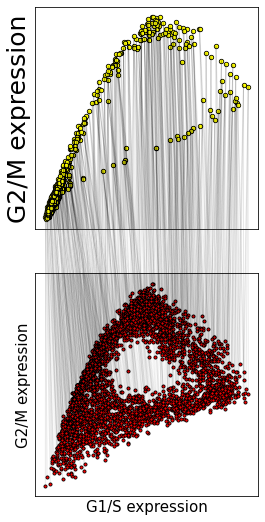

In [13]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=(4,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(*xs.T, c='yellow', s=20, ec='k', linewidth=.8)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel("G2/M expression", size=25)
ax2.scatter(*yt.T, c='r', s=10, ec='k', linewidth=.8)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("G1/S expression", size=15)
ax2.set_ylabel("G2/M expression", size=15)

for (i, j), d in zip(pairs, vals):
    con = ConnectionPatch(
        xyA=yt[j], 
        xyB=xs[i], 
        coordsA="data", 
        coordsB="data",
        axesA=ax2, 
        axesB=ax1, 
        color="k",
        alpha=50*d)
    ax2.add_artist(con)


plt.savefig("matching.png")

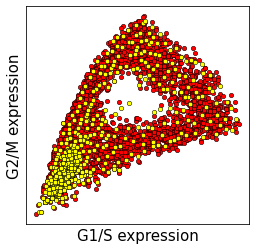

In [14]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, s=20, c='red', ec='k', linewidth=.5)
plt.scatter(*xt_weighted.T, s=20, c='yellow', ec='k', linewidth=.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_integrated.png")

In [15]:
distances_s = np.diag(xs @ xs.T)**(1/32)
distances_s = (distances_s - distances_s.min())/(distances_s.max() - distances_s.min())
distances_t = np.diag(yt @ yt.T)**(1/32)
distances_t = (distances_t - distances_t.min())/(distances_t.max() - distances_t.min())

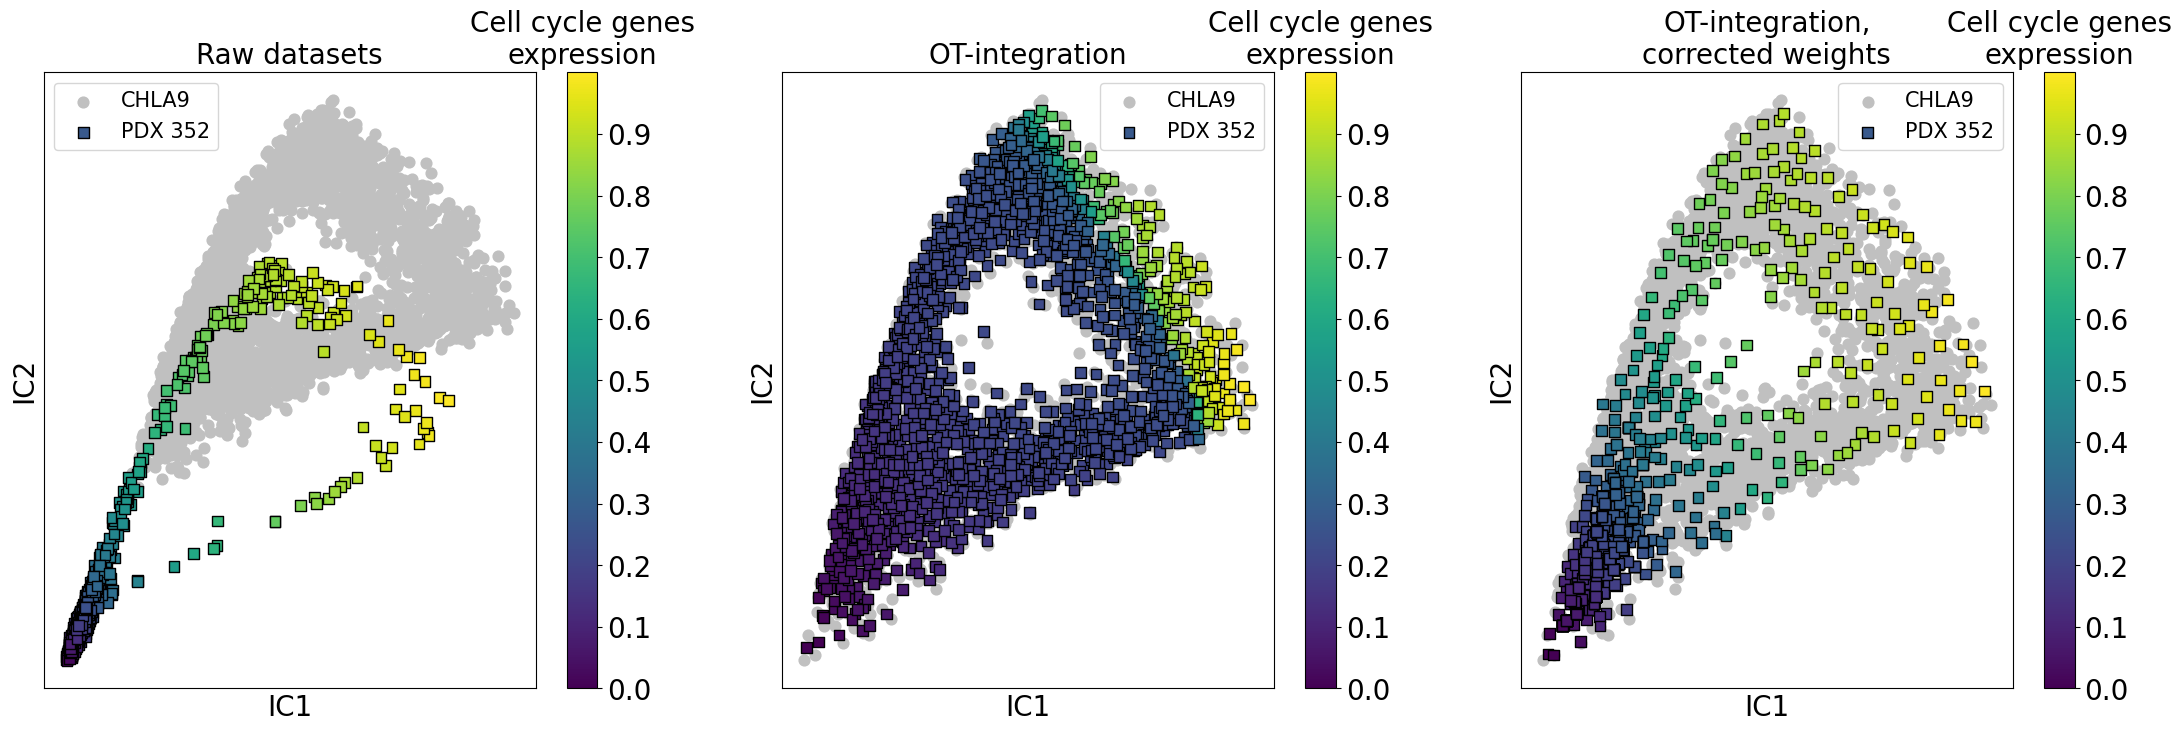

In [16]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_unweighted.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_weighted.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration,\ncorrected weights', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

pass

In [17]:
distances_stu = w_unweighted.label_transfer(distances_t)
distances_stw = w_weighted.label_transfer(distances_t)

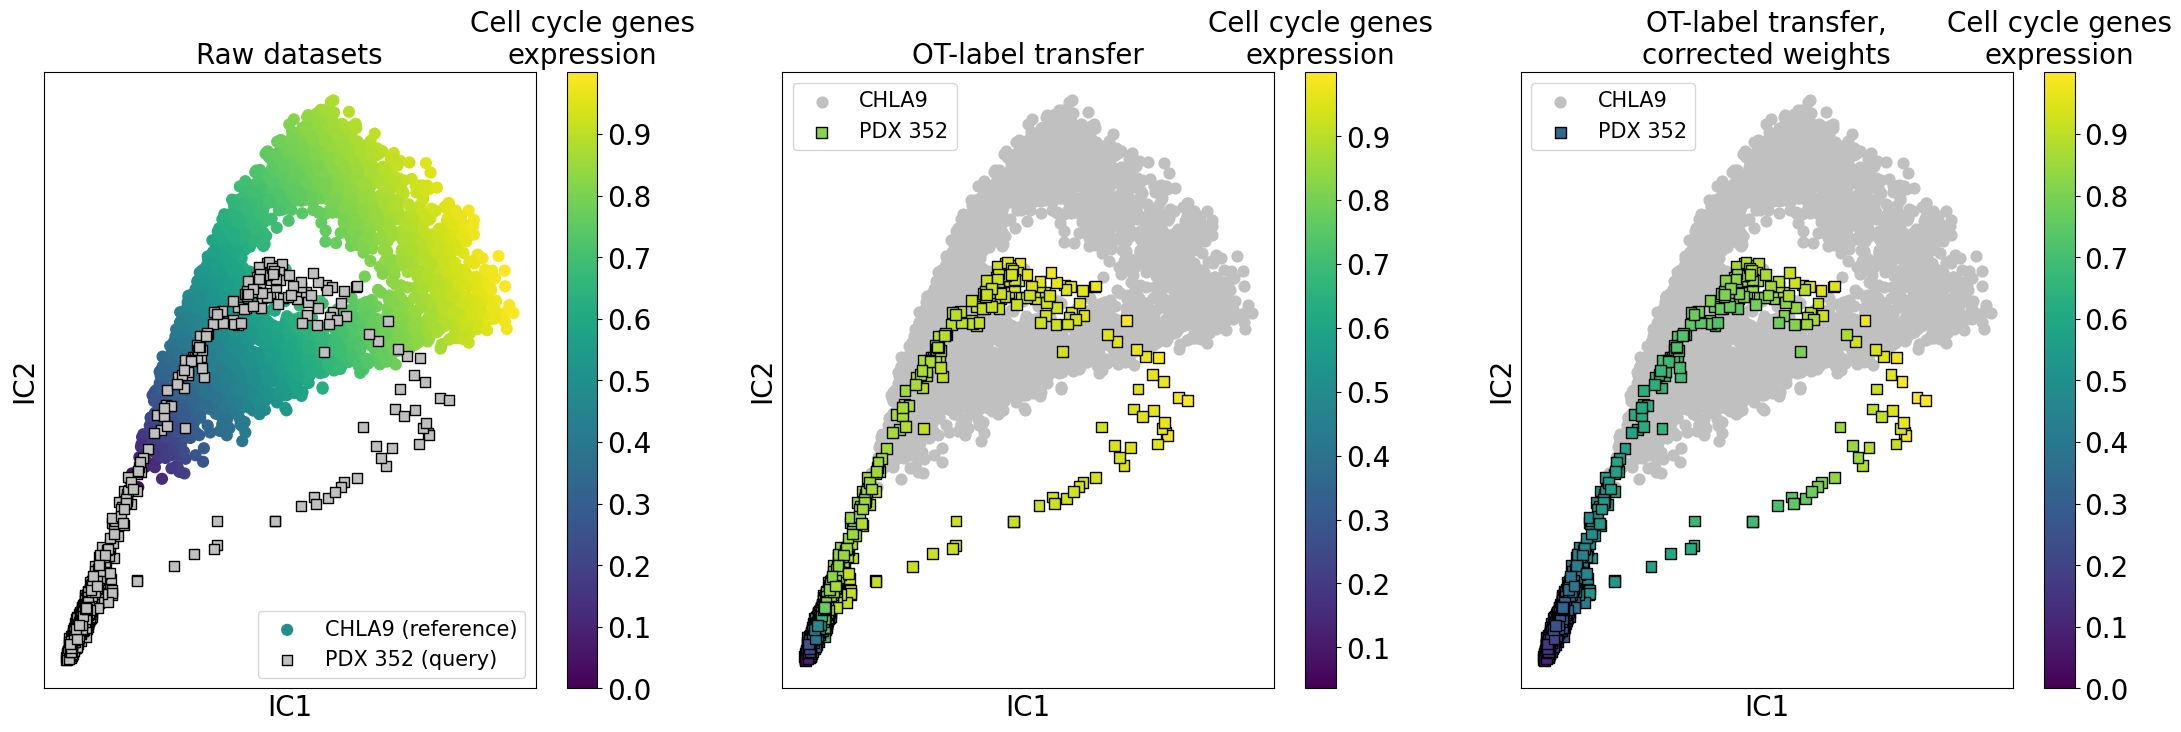

In [18]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt.T, s=60, c=distances_t, label='CHLA9 (reference)')
plt.scatter(*xs.T, s=60, c='silver', cmap='viridis', ec='k', label='PDX 352 (query)', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_stu, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-label transfer', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_stw, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-label transfer,\ncorrected weights', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

pass